# Большое практическое задание 1
# Классификация изображений цифр метрическими методами

## курс "Машинное обучение 1", программа AIMasters, 2022

## Студент: Зеленин Герман Евгеньевич

## Введение

Данное задание направлено на ознакомление с метрическими алгоритмами классификации, а также методами работы с изображениями. В задании вам будет необходимо:

1. Написать на языке Python собственные реализации метода ближайших соседей и кросс-валидации. Реализации должны соответствовать спецификации, описанной в прилагающихся модулях.     
    Частично проверить правильность выполнения своих реализаций можно с помощью системы ejudge в соответствующем соревновании.
    **Внимание.** Прохождение всех тестов в соревновании не гарантирует правильность решения.


2. Провести описанные ниже эксперименты с датасетом изображений цифр MNIST, описать полученые результаты и ответить на предложенные вопросы.


3. Подготовить отчёт о проделанной работе. Удалите черновые выводы, оставьте только тот код, который является ответом к пунктам задания. Сохраните ноутбук в форматах .ipynb и .html одновременно.

    **Замечание.** Чтобы экспорировать jupyter notebook в .html нужно выбрать:
    `File -> Download as -> HTML (.html).`
    Для экспорта notebook в .html в Google Colab, воспользуйтесь [следующим кодом](https://gist.github.com/vbugaevskii/b9c6181f2ad83e11f5b9c92d315cb2de).
Большая просьба: подписывайте свой отчет (в названии файла и внутри ноутбука).


4. В систему проверки необходимо сдать отчёт в обоих форматах и .zip архив с написанными модулями.

    Большая просьба: jupyter notebook и html файл не запаковывать в архив, а сдавать отдельно.

### Некоторые полезные советы

1. Для того, чтобы не перезагружать jupyter notebook каждый раз после того, как вы внесли изменения в модуль `knn`, можно добавить ячейку с таким содержимым:
     
```
    %load_ext autoreload
    
    %autoreload 2
```
   
2. Не нужно копировать свой код из модулей в jupyter notebook, пользуйтесь им, как если бы это была библиотека. Для этого поместите директорию `knn` рядом с notebook-ом. Пример, как может выглядеть содержимое вашей рабочей директории:

```
    tree
    ---knn
    ------__init__.py
    ------classification.py
    ------distances.py
    ------model_selection.py
    ------nearest_neighbors.py
    ---tests
    ------__init__.py
    ------test_classification.py
    ------test_distances.py
    ------test_model_selection.py
    ------test_nearest_neigbours.py
    experiments.ipynb
```

## Реализация алгоритмов (10 баллов)

Прототипы функций должны строго соответствовать прототипам, описанным в спецификации и проходить
все выданные тесты. Задание, не проходящее все выданные тесты, приравнивается к невыполненному. При
написании **необходимо пользоваться** стандартными средствами языка Python и библиотекой numpy. Библиотеками scipy и scikit-learn пользоваться **запрещено**, если это не обговорено отдельно в пункте задания. Для
экспериментов в бонусной части разрешается пользоваться любыми открытыми библиотеками, реализующими
алгоритмы обработки изображений.

Среди предоставленных файлов должны быть следующие модули и функции в них

1. Модуль `knn.distances` с реализацией функции для вычисления расстояния:
    1. `euclidean_distance(X, Y)` — реализация евклидова расстояния с заданными свойствами;
    2. `cosine_distance(X, Y)` — реализация косинусного расстояния с заданными свойствами;


2. Модуль `knn.nearest_neighbors`, содержащий собственную реализацию поиска ближайших соседей.
    
    Класс `NearestNeighborsFinder` с методами:
      1. `__init__(self, n_neighbors, metric="euclidean")` — конструктор (инициализатор) класса;
      2. `fit(self, X, y=None)` — обучение алгоритма;
      3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей.


3. Модуль `knn.classification`, содержащий собственную реализацию классификатора на основе метода ближайших соседей.

    Класс `KNNClassifier` с методами:
    
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’)` — конструктор (инициализатор) класса;
    2. `fit(self, X, y=None)` — обучение алгоритма;
    3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей;
    4. `predict(self, X)` — редсказание на новых данных;
    5. `_predict_precomputed(self, indices, distances)` — вспомогательный метод.
    
   Класс `BatchedKNNClassifier`, полезный для работы с большими выборками, с методами:
   
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’, batch_size=None)` — конструктор (инициализатор) класса
    2. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей, разбитый на несколько итераций по батчам
    3. `set_batch_size(self, batch_size)` — метод для выставления нового значения размера батча


4. Модуль `knn.model_selection` с реализациями функций для применения кросс-валидации:

    1. `knn_cross_val_score(X, y, k_list, scoring, cv=None, **kwargs)` — функция для измерения качества на кросс-валидации.

Ожидается, что реализациия всех классов и функций будет максимально эффективной. Дополнительно вам предоставлены открытые unit-тесты, которые находятся рядом с модулем `knn` в директории `tests` Чтобы запустить тесты в консоли требуется выполнить одну из команд:


```
$ python -m unittest                            # запуск всех тестов
$ python -m unittest tests/test_distances.py    # запуск конкретных тестов
```

## Эксперименты (15 баллов)

Здесь вы можете заимпортировать всё, что вам потребуется для экспериментов:

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from knn.distances import euclidean_distance, cosine_distance 
from knn.classification import BatchedKNNClassifier
from knn.model_selection import knn_cross_val_score

### 1. Загрузка даннных

Эксперименты этого задания необходимо проводить на датасете MNIST. Загрузить датасет можно при помощи функции `sklearn.datasets.fetch_openml("mnist_784")` или скачать вручную с сайта
http://yann.lecun.com/exdb/mnist/. Датасет необходимо разбить на обучающую выборку (первые 60 тыс.
объектов) и тестовую выборку (10 тыс. последних объектов).

In [19]:
from sklearn.datasets import fetch_openml

mnist_data = fetch_openml('mnist_784')

In [20]:
X, y = mnist_data['data'], mnist_data['target']
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### 2. Исследование скорости методов поиска (4 балла)

Исследуйте, какой алгоритм поиска ближайших соседей будет быстрее работать в различных ситуациях.

Измерьте для каждого алгоритма поиска (`kd_tree`, `ball_tree`, `brute` и `my_own`) время нахождения 5 ближайших соседей для каждого объекта тестовой выборки по евклидовой метрике. Выберите подмножество признаков, по которому будет считаться расстояние, размера 10, 20, 100 (подмножество признаков выбирается один раз для всех объектов, случайно).

**Замечание.** Для оценки времени долго работающих функций можно пользоваться либо функциями из
модуля time, либо magic-командой %time, которая запускает код лишь один раз.

In [22]:
from random import randint
import time

features = []
for i in range(100):
    features.append(randint(0, 784))
    
d = {}
k_count = [10, 20, 100]

for i in k_count:
    X_train_loc = X_train.iloc[:, features[:i]].to_numpy()
    X_test_loc = X_test.iloc[:, features[:i]].to_numpy()
    for algo in ['kd_tree', 'ball_tree', 'brute', 'my_own']:
        classifier = BatchedKNNClassifier(5, algorithm=algo)
        s.fit(X_train_loc, y_train.to_numpy())
        start_time = time.time()
        s.kneighbors(X_test_loc, return_distance = False)
        t = time.time() - start_time
        print("Count features: ", i, " algo: ", algo, " time: ", t)
        if i == k_count[0]:
            d[algo] = [t]
        else:
            d[algo] = d[algo]+[t]

Count features:  10  algo:  kd_tree  time:  1.1986141204833984
Count features:  10  algo:  ball_tree  time:  0.9531590938568115
Count features:  10  algo:  brute  time:  0.944655179977417
Count features:  10  algo:  my_own  time:  0.9447000026702881
Count features:  20  algo:  kd_tree  time:  3.9064829349517822
Count features:  20  algo:  ball_tree  time:  3.862971782684326


KeyboardInterrupt: 

#### Приведите график / таблицу с результатами вашего эксперимента

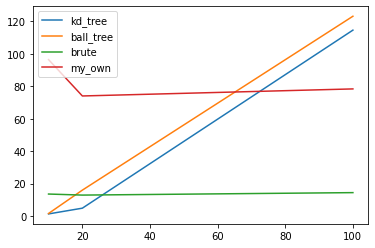

In [57]:
import pandas as pd
kd_tree = [i_10[0], i_20[0], i_100[0]]
ball_tree = [i_10[1], i_20[1], i_100[1]]
brute = [i_10[2], i_20[2], i_100[2]]
my_own = [i_10[3], i_20[3], i_100[3]]

data = {'kd_tree': kd_tree,
        'ball_tree': ball_tree,
        'brute':brute,
        'my_own':my_own}
df = pd.DataFrame(data)
x = np.array([10, 20, 100])
plt.plot(x,df)
plt.legend(data, loc=2)
plt.show()

#### Ответьте на следующие вопросы

1. Какой алгоритм сработал быстрее всего для каждого из размера подвыборок? Ожидали ли вы такие результаты до проведения эксперимента?

   На выборке 10-ти и 20-ти признаков лучше всего показал себя алгоритм kd_tree, на выборке из 100 признаков лучше всего показывает себя brute. Если знать как работает каждый алгоритм, то такой график вполне ожидаем

2. Приведите теоретическую сложность каждого из алгоритмов поиска. Согласуется ли время работы алгоритмов на практике с их теоретической вычислительной сложностью? Как вы думаете, почему?

   Пусть n - число образцов, m - число признаков, k==1

   kd-tree: Сложность при построении O(mnlogn). Сложность при запросе для m<20 O(mlogn), для большего O(nm)
   
   ball-tree: Сложность при построении O(mnlogn). Сложность при запросе O(nm)
   
   brute: Сложность при построении O(mn^2). Сложность при запросе: O(nm) 
   
   my_own: Сложность при построении O(mn^2). Сложность при запросе: O(nm) 
   
   Не согласуется

3. Какой алгоритм исходя из результатов эксперимента следует использовать в дальнейшем? Выберите алгоритм поиска соседей, который вы будете использовать во всех экспериментах ниже. 

    Лучше всего использовать brute, так как он устойчив к изменению числа признаков

### 3. Исследование зависимости точности алгоритма на кросс-валидации (4 балла)


Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) алгоритма k ближайших соседей в зависимости от следующих факторов:
* количество соседей k от 1 до 10
* используется евклидова или косинусная метрика

In [73]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=3)
scores_pred_euclidean = knn_cross_val_score(X.to_numpy(), y.to_numpy().astype(int), k_list=range(1,11), cv=cv, algorithm = 'brute', scoring='accuracy')
scores_pred_cosine = knn_cross_val_score(X.to_numpy(), y.to_numpy().astype(int), k_list=range(1,11), cv=cv, algorithm = 'brute', scoring='accuracy', metric = 'cosine')

In [80]:
euclidean_cv = []
for k in range(1,11):
    euclidean_cv = euclidean_cv + [np.mean(scores_pred_euclidean[k])]
cosine_cv = []
for k in range(1,11):
    cosine_cv = cosine_cv + [np.mean(scores_pred_cosine[k])]

#### Нарисуйте график зависимости точности от количества соседей по каждой метрике

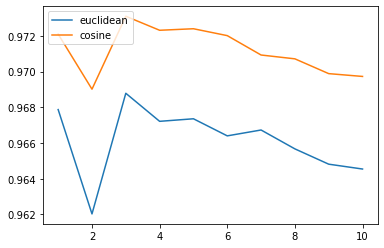

In [81]:
import pandas as pd
data = {'euclidean': euclidean_cv,
        'cosine': cosine_cv}
df = pd.DataFrame(data)
x = np.array(range(1,11))
plt.plot(x,df)
plt.legend(data, loc=2)
plt.show()

#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор (например, если у вас несколько наборов параметров с высоким качеством, обоснуйте как вы выберите среди этих наборов один).

   Я выберу косинусную метрику, k = 3


2. Какая метрика лучше себя показала в экспериментах? Можете ли вы объяснить, почему?

   Лучше всего показывает себя косинусная метрика. Кажется, что векторы одинаковых цифр будут иметь похожие координаты, что и показывает косинусная метрика.
    
   
2. Есть ли на графике зависимости точности от количество соседей "выбросы", резкие падения/повышения качества для одного значения k по сравнению с соседними? Если да, предположите причину появления этих выбросов.

    Да, падения есть. Эти падения находятся на четных k. Это проблема выбора из точек, лежащих на одинаковом удалении от точки.

### 3. Исследование зависимости точности взвешенного алгоритма на кросс-валидации (4 балла)

По результатам предыдущего эксперимента выберите метрику, которую вы будете использовать в этом эксперименте.

Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) взвешенного алгоритма k ближайших соседей в зависимости от количество соседей k (от 1 до 10).

Голос объекта положите равным `1 / (distance + eps)`, где `eps` = `1e-5`.

In [13]:
import pandas as pd
from sklearn.model_selection import KFold
cv = KFold(n_splits=3)
scores_pred_cosine = knn_cross_val_score(X.to_numpy(), y.to_numpy().astype(int), k_list=range(1,11), cv=cv, algorithm = 'brute', scoring='accuracy', metric = 'cosine', weights = "distance")
cosine_cv = []
for k in range(1,11):
    cosine_cv = cosine_cv + [np.mean(scores_pred_cosine[k])]

#### Нарисуйте график зависимости точности от количества соседей 

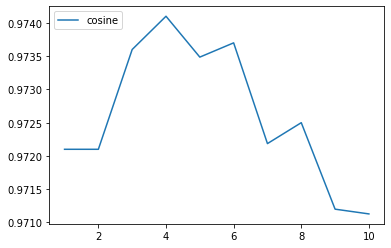

In [14]:
data = {'cosine': cosine_cv}
df = pd.DataFrame(data)
x = np.array(range(1,11))
plt.plot(x,df)
plt.legend(data, loc=2)
plt.show()

#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор.

   k = 4 поскольку ошибка на этом алгоритме стала ниже


2. Сравните результаты взвешенного алгоритма с невзвешенным. Объясните разницу/отсутствие разницы в результатах.

   Результат на всех значениях k стал лучше. 

### 4. Применение алгоритма и интерпретация ошибок (3 балла)

1. Примените лучший алгоритм к исходной обучающей и тестовой выборке и посчитайте точность классификации. Сравните с точностью по кросс-валидации. Опишите ваши результаты.

In [16]:
from sklearn.metrics import accuracy_score

s = BatchedKNNClassifier(4, algorithm = 'brute', metric = 'cosine', weights = "distance")
s.fit(X_train, y_train)
y_pred = s.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9752


Точность стала выше, чем на кросс-валидации. Это объясняется тем, что на кросс-валидации мы усредняем значения метрики.

2. Постройте и проанализируйте матрицу ошибок (confusion matrix), используйте функцию `sklearn.metrics.confusion_matrix`. Визуализируйте несколько объектов из тестовой выборки, на которых были допущены ошибки. Проанализируйте и укажите их общие черты.

In [19]:
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[ 977,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1129,    3,    1,    0,    0,    2,    0,    0,    0],
       [   8,    0, 1009,    1,    1,    0,    0,    8,    5,    0],
       [   0,    1,    3,  976,    1,   12,    0,    4,    9,    4],
       [   2,    1,    0,    0,  946,    0,    6,    2,    0,   25],
       [   4,    0,    0,    9,    1,  863,    7,    1,    4,    3],
       [   3,    3,    0,    0,    1,    3,  948,    0,    0,    0],
       [   2,   10,    4,    0,    1,    0,    0,  998,    0,   13],
       [   7,    1,    2,    9,    3,    3,    5,    4,  936,    4],
       [   7,    7,    2,    5,    7,    3,    1,    4,    3,  970]])

*ваше описание здесь*

## Бонус 1. Размножение обучающей выборки (3 балла)

Размножьте обучающую выборку с помощью поворотов, смещений, применений гауссовского фильтра и морфологических операций. Разрешается использовать библиотеки для работы с изображениями. Подобрать по кросс-валидации с 3 фолдами параметры преобразований. Рассмотреть следующие параметры для преобразований и их комбинации:
1. Величина поворота: 5, 10, 15 (в каждую из двух сторон)
2. Величина смещения: 1, 2, 3 пикселя (по каждой из двух размерностей)
3. Дисперсия фильтра Гаусса: 0.5, 1, 1.5
4. Морфологические операции: эрозия, дилатация, открытие, закрытие с ядром 2

Проанализируйте, как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое
преобразование.

**Замечание.** Не обязательно хранить все обучающие выборки в процессе эксперимента. Достаточно вычислить ближайших соседей по каждой из выборок, а затем выбрать из них ближайших соседей.

**Замечание по дизайну эксперимента**. В этой части вам предлагается самим выбрать дизайн эксперимента. Перебор всевоможных комбинаций преобразований может быть затруднительным, в то время как жадный выбор преобразований уже даст улучшение в качестве.

In [ ]:
## your code here ##

## Бонус 2. Размножение тестовой выборки (2 балла)

Реализуйте предложенный на семинаре алгоритм, основанный на преобразовании объектов тестовой выборки.
Проверьте то же самое множество параметров, что и в предыдущем пункте.

Проанализируйте как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое
преобразование.

In [ ]:
## your code here ##

## Бонус 3. Сравнение подходов (1 балл)

Если вы реализовали оба подхода, сравните их между собой.

1. Какой подход даёт больший выигрыш в качестве и почему?

    *ваш ответ*
    

2. Есть ли какие-то преимущества у худшего по качеству подхода по сравнению с лучшим?

    *ваш ответ*